<style>
.brown {
    color: #ef233c;
    font-weight:700;
    font-size: 50px;
    text-align:center;
    justify-content: center;
    padding: 0;
    margin: 0;
}
</style>

<style>
.linea {
  border-top: 2px solid #9d0208;
  height: 5px;
  max-width: 1200px;
  text-align:center;
  justify-content: center;
  padding: 0;
  margin: 0;
}
</style>
<p class="brown">
    PROJECT S&P500 - DATA ANALYTICS
</p>

<div class="linea"></div>

<style>
.brown {
    color: #f48c06;
    font-weight:700;
    font-size: 20px;
    text-align:botton;
    justify-content: center;
    padding: 0;
    margin: 0;
}
</style>

</style>
<p class="brown">
    LIBRARIES THAT WE ARE GOING TO USE.
</p>

In [1]:
!pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import yfinance as yf

<style>
.linea {
  border-top: 2px solid #f48c06;
  height: 5px;
  max-width: 1200px;
  text-align:center;
  justify-content: center;
  padding: 0;
  margin: 0;
}
</style>

<div class="linea"></div>

<style>
.brown {
    color: #f48c06;
    font-weight:700;
    font-size: 20px;
    text-align:botton;
    justify-content: center;
    padding: 0;
    margin: 0;
}
</style>

</style>
<p class="brown">
    LOAD THE S&P500 DATA (23 YEARS OLD).
</p>

In [2]:
# Get the stock symbols of the S&P500.
sp500Symbols = [symbol for symbol in pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()]

# Filter the date with which we are going to be working.
dateS = '2000-01-01'
dateE = '2023-03-23'

# Create a dataframe where we are going to store that data.
dfSP500 = pd.DataFrame()

# Check what symbols it brings.
print(sp500Symbols)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CV

In [3]:
# Look for values ​​that contain ".".
for i in sp500Symbols:
  if i.find('.')!=-1:
    print(i)

BRK.B
BF.B


In [4]:
# Replace 'BRK.B' with 'BRK-B'
if 'BRK.B' in sp500Symbols:
    idx = sp500Symbols.index('BRK.B')
    sp500Symbols[idx] = 'BRK-B'

# Replace  'BF.B' with 'BF-B'
if 'BF.B' in sp500Symbols:
    idx = sp500Symbols.index('BF.B')
    sp500Symbols[idx] = 'BF-B'

print(sp500Symbols)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CV

In [5]:
# Download the data corresponding to each symbol.
for symbol in sp500Symbols:
    try:
        print('\033[1;32m' + f' DOWNLOADING DATA FOR: {symbol}' + '\033[0m')
        data = yf.download(symbol, start=dateS, end=dateE)
        if not data.empty:
            data['Symbol'] = symbol
            dfSP500 = pd.concat([dfSP500, data], axis=0)
    except Exception as e:
        print('\033[1;31m' + f'ERROR DOWNLOADING DATA FOR: {symbol}: {e}' + '\033[0m')

 DOWNLOADING DATA FOR: MMM
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: AOS
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: ABT
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: ABBV
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: ACN
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: ATVI
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: ADM
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: ADBE
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: ADP
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: AAP
[*********************100%***********************]  1 of 1 completed
 DOWNLOADING DATA FOR: AES
[*********

In [6]:
# Check the data.
dfSP500.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.18750,25.525520,2173400,MMM
2000-01-04,46.43750,47.40625,45.31250,45.31250,24.511246,2713800,MMM
2000-01-05,45.56250,48.12500,45.56250,46.62500,25.221230,3699400,MMM
2000-01-06,47.15625,51.25000,47.15625,50.37500,27.249760,5975800,MMM
2000-01-07,50.56250,51.90625,49.96875,51.37500,27.790707,4101200,MMM
2000-01-10,50.21875,51.75000,50.00000,51.12500,27.655457,3863800,MMM
2000-01-11,50.37500,51.25000,50.25000,50.25000,27.182137,2357600,MMM
2000-01-12,50.96875,51.81250,50.37500,50.37500,27.249760,2868400,MMM
2000-01-13,50.65625,50.93750,50.18750,50.37500,27.249760,2244400,MMM


In [7]:
# We solve the visual problem of 'Date', and we see the dataset info.
dfSP500.reset_index(inplace=True)
dfSP500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626035 entries, 0 to 2626034
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Adj Close  float64       
 6   Volume     int64         
 7   Symbol     object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 160.3+ MB


<style>
.brown {
    color: #f48c06;
    font-weight:700;
    font-size: 20px;
    text-align:botton;
    justify-content: center;
    padding: 0;
    margin: 0;
}
</style>

</style>
<p class="brown">
    EXPANDING THE DATASET WITH MORE INFORMATION...
</p>

In [8]:
# Load the page data.
dfCompanies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# Join them using the Symbol column.
dfSP500 = pd.merge(dfSP500, dfCompanies, on='Symbol')

# Check the dataset.
dfSP500.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,2000-01-03,48.03125,48.25000,47.03125,47.18750,25.525520,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2000-01-04,46.43750,47.40625,45.31250,45.31250,24.511246,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,2000-01-05,45.56250,48.12500,45.56250,46.62500,25.221230,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
3,2000-01-06,47.15625,51.25000,47.15625,50.37500,27.249760,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
4,2000-01-07,50.56250,51.90625,49.96875,51.37500,27.790707,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
5,2000-01-10,50.21875,51.75000,50.00000,51.12500,27.655457,3863800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
6,2000-01-11,50.37500,51.25000,50.25000,50.25000,27.182137,2357600,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
7,2000-01-12,50.96875,51.81250,50.37500,50.37500,27.249760,2868400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
8,2000-01-13,50.65625,50.93750,50.18750,50.37500,27.249760,2244400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
9,2000-01-14,50.37500,50.46875,49.46875,49.65625,26.860956,2541800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


In [9]:
# Renombro las columnas:
dfSP500 = dfSP500.rename(columns={  'Adj Close': 'Adj_Close', 
                                    'GICS Sector': 'Sector', 
                                    'GICS Sub-Industry': 'Sub_Industry',
                                    'Headquarters Location': 'Location',
                                    'Date added	': 'Date_Added'})


# Checkeamos cuales empresas estan dentro de nuestro dataset dentro del sector "Consumer Discretionary"
dfSP500['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

<style>
.linea {
  border-top: 2px solid #f48c06;
  height: 5px;
  max-width: 1200px;
  text-align:center;
  justify-content: center;
  padding: 0;
  margin: 0;
}
</style>

<div class="linea"></div>


<style>
.brown {
    color: #f48c06;
    font-weight:700;
    font-size: 20px;
    text-align:botton;
    justify-content: center;
    padding: 0;
    margin: 0;
}
</style>

</style>
<p class="brown">
    DATA UNDERSTANDING (GRAPHS).
</p>

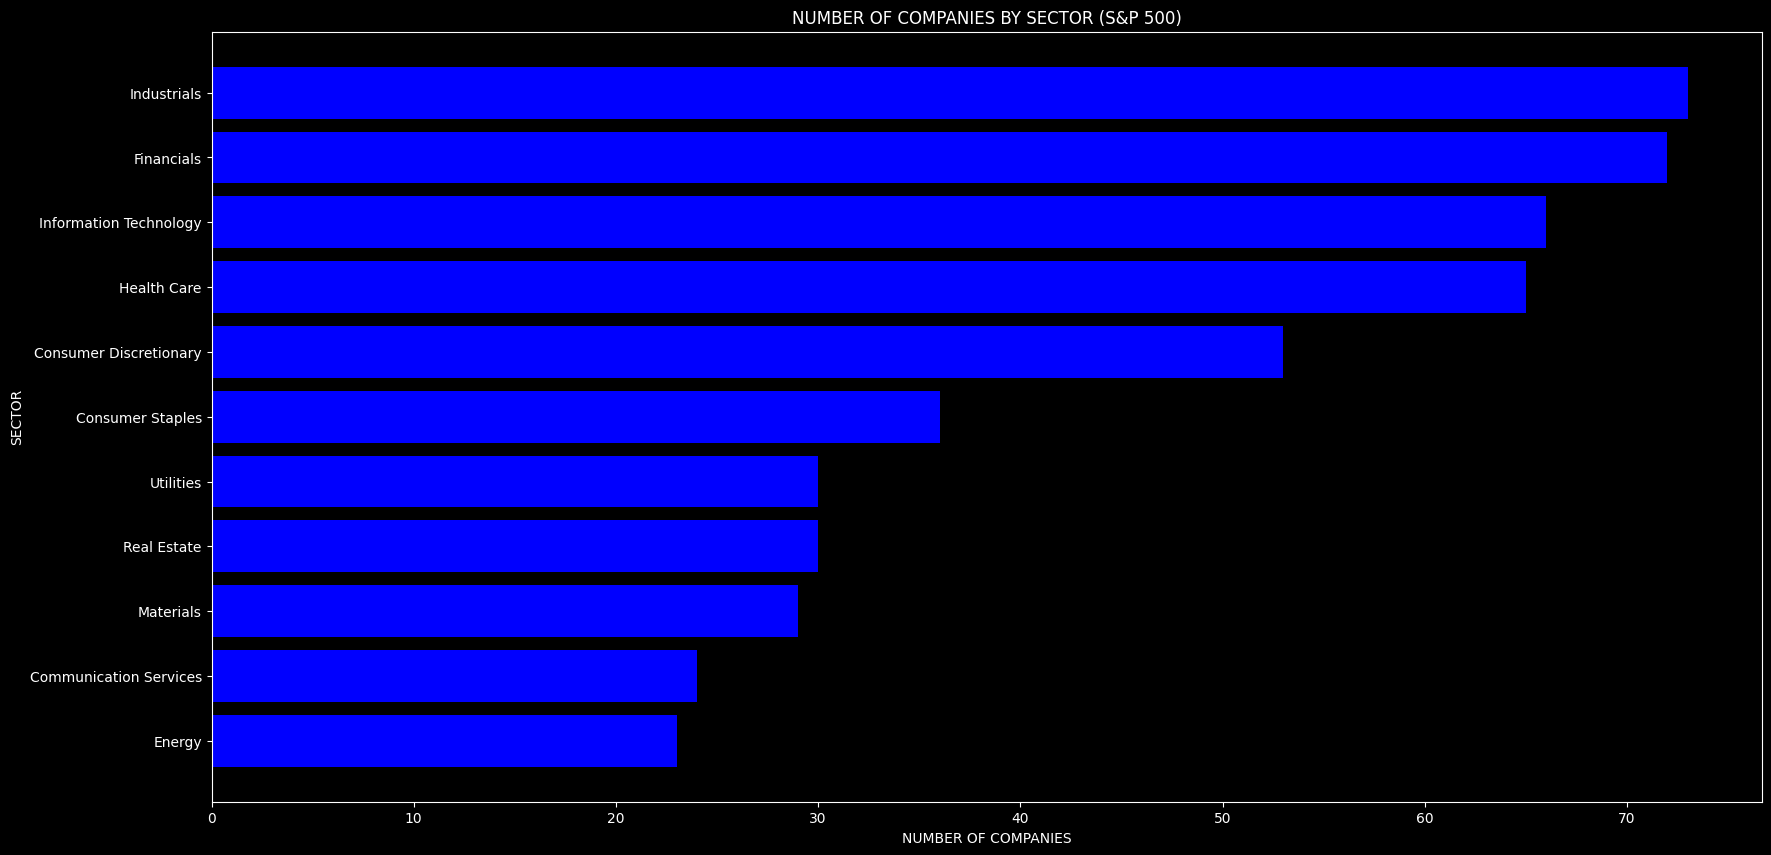

In [10]:
# Group companies by sector and count the number of companies in each sector.
sectorCounts = dfSP500.groupby('Sector')['Symbol'].nunique()

# Order the sectors from largest to smallest.
sectorCounts = sectorCounts.sort_values(ascending=True)

# Created a horizontal bar chart
plt.figure(figsize=(20, 10))
plt.barh(sectorCounts.index, 
         sectorCounts.values, 
         color='blue')
plt.xlabel('NUMBER OF COMPANIES')
plt.ylabel('SECTOR')
plt.title('NUMBER OF COMPANIES BY SECTOR (S&P 500)')
plt.show()

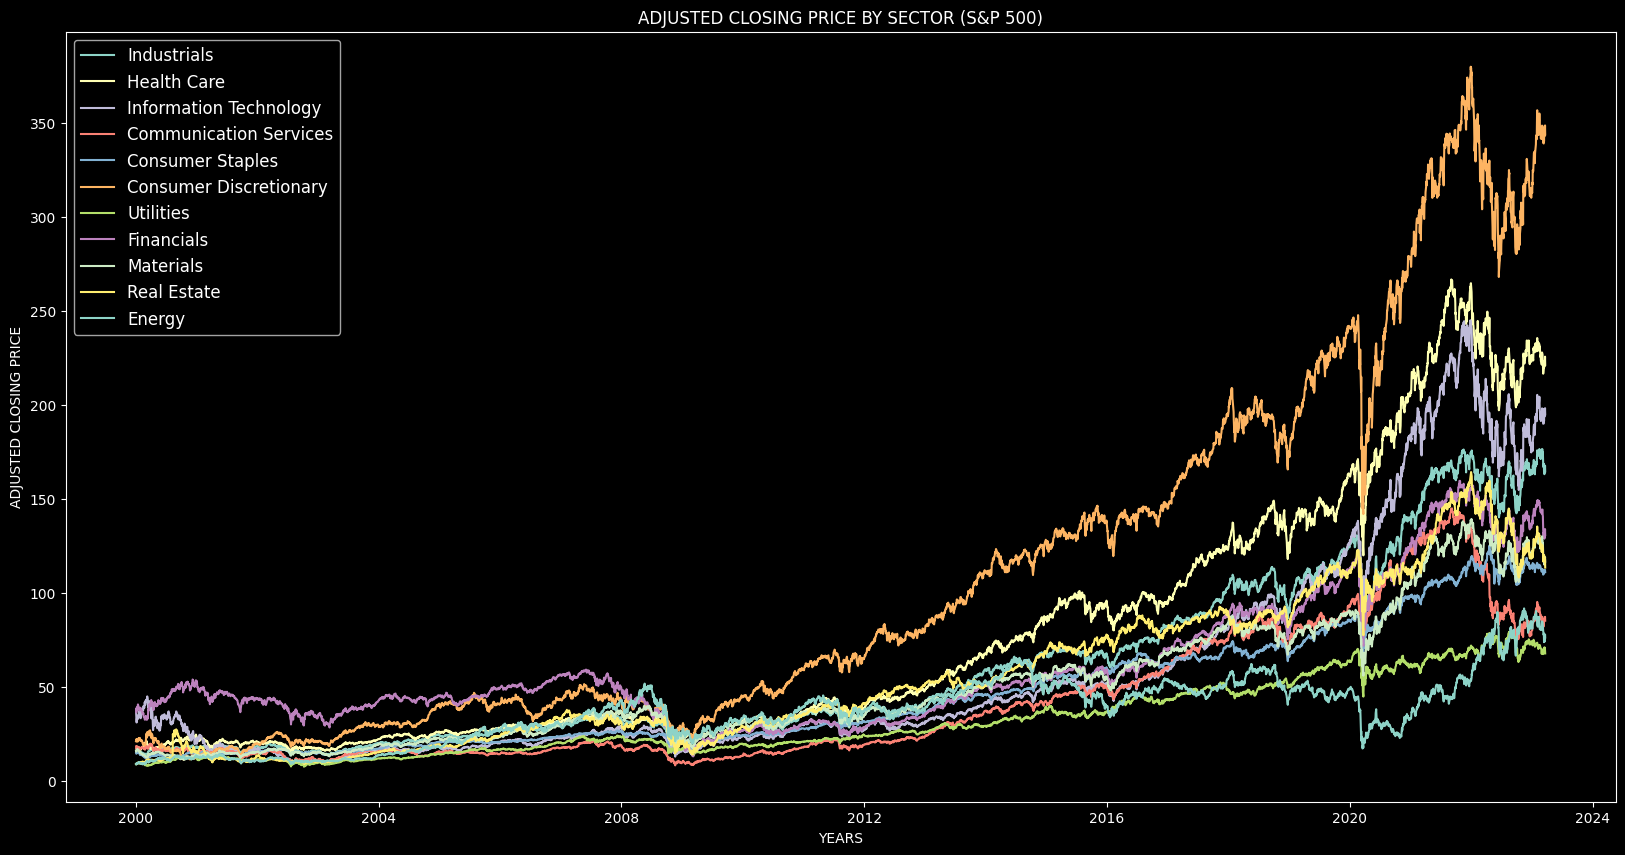

In [11]:
# Calculated the average adjusted closing price by sector and by year.
sp500Avg = dfSP500.groupby(['Sector', 'Date'])['Adj_Close'].mean().reset_index()

# Created a line chart.
plt.figure(figsize=(20, 10))

for sector in dfSP500['Sector'].unique():
    sectorData = sp500Avg[sp500Avg['Sector'] == sector]
    plt.plot(sectorData['Date'], sectorData['Adj_Close'], label=sector)

plt.xlabel('YEARS')
plt.ylabel('ADJUSTED CLOSING PRICE')
plt.title('ADJUSTED CLOSING PRICE BY SECTOR (S&P 500)')
plt.legend(loc='upper left', fontsize=12)
plt.show()

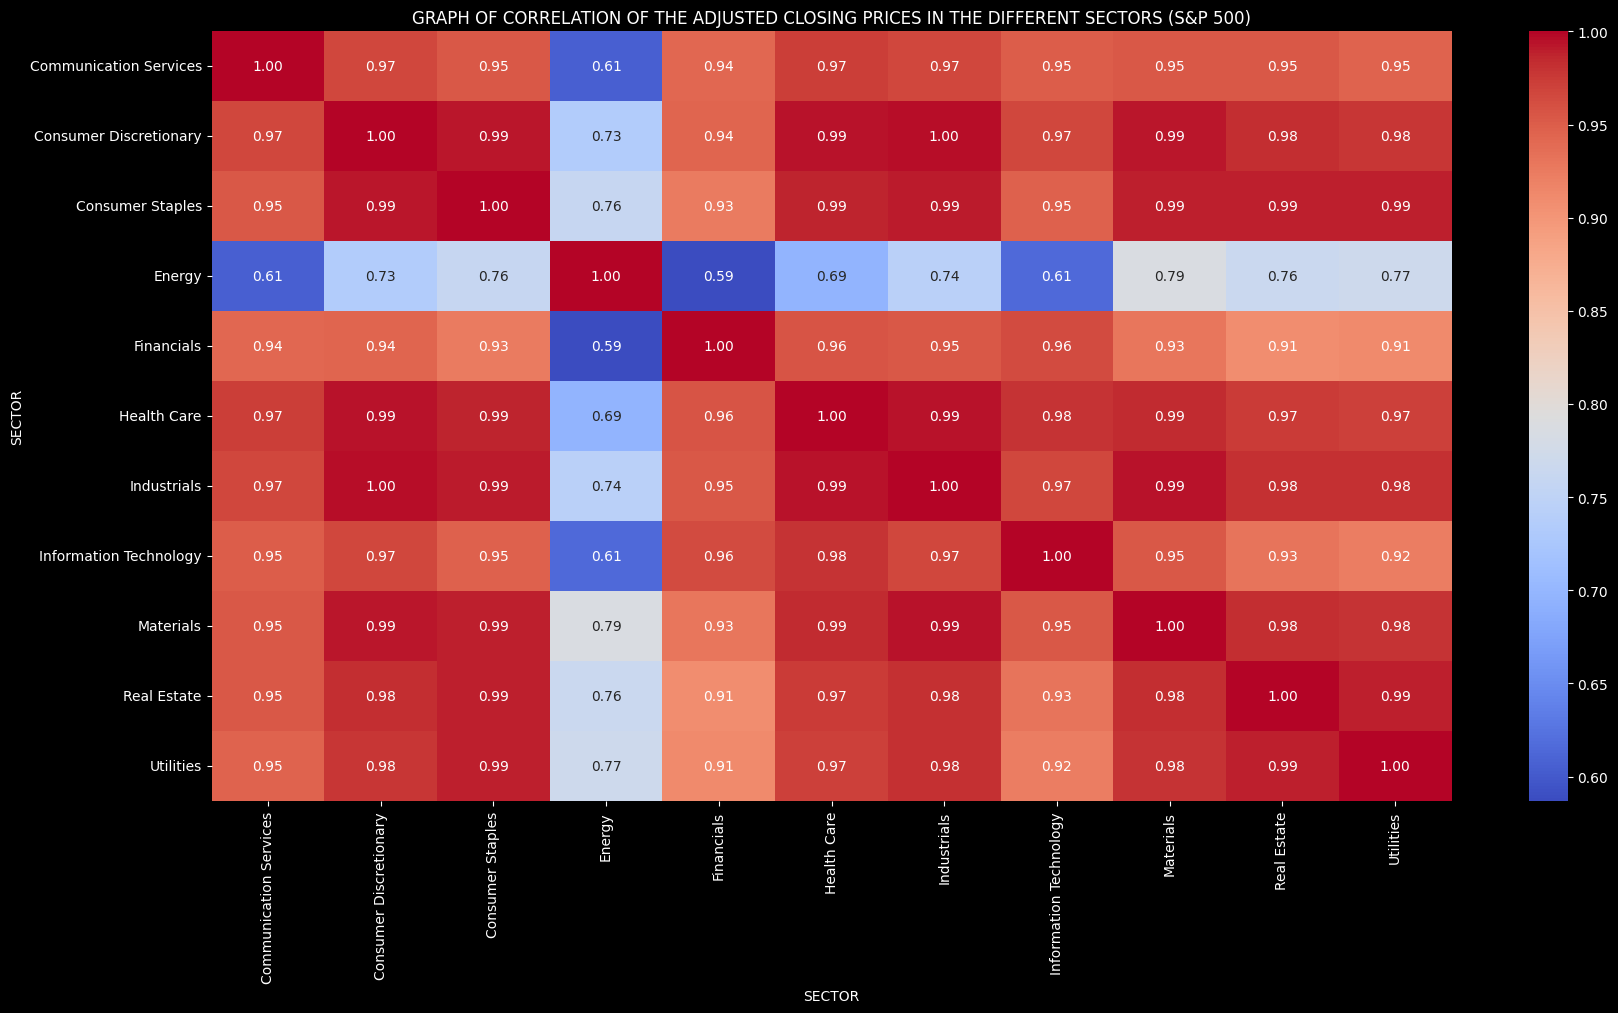

In [12]:
# Calculate the closing prices by sector.
sectorPrices = dfSP500.pivot_table(values='Adj_Close', index='Date', columns='Sector')

# Calculate the correlation matrix.
corrMatrix = sectorPrices.corr()

# Created the correlation graph.
plt.figure(figsize=(20, 10))
sns.heatmap(corrMatrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('GRAPH OF CORRELATION OF THE ADJUSTED CLOSING PRICES IN THE DIFFERENT SECTORS (S&P 500)')
plt.xlabel('SECTOR')
plt.ylabel('SECTOR')
plt.show()

<style>
.linea {
  border-top: 2px solid #f48c06;
  height: 5px;
  max-width: 1200px;
  text-align:center;
  justify-content: center;
  padding: 0;
  margin: 0;
}
</style>

<div class="linea"></div>

<style>
.brown {
    color: #f48c06;
    font-weight:700;
    font-size: 20px;
    text-align:botton;
    justify-content: center;
    padding: 0;
    margin: 0;
}
</style>

</style>
<p class="brown">
    EXPORTING THE DATASET.
</p>

In [13]:
# Saving the file in a csv.
dfSP500.to_csv('S&P-500.csv')

---

~~~
    PROJECT BY DANIELE, EMILIANO GASTÓN.
~~~

---